In [ ]:
%pip install -U git+https://github.com/zalandoresearch/pytorch-ts.git@version-0.7.0

In [ ]:
import json
from itertools import islice

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

from gluonts.dataset.repository.datasets import get_dataset
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

from gluonts.torch.model.patch_tst import PatchTSTEstimator
from pts.model.transformer import TransformerEstimator

In [ ]:
dataset = get_dataset("m4_weekly")

In [ ]:
print(f"Recommended prediction horizon: {dataset.metadata.prediction_length}")
print(f"Frequency of the time series: {dataset.metadata.freq}")

## Vanilla Transformer

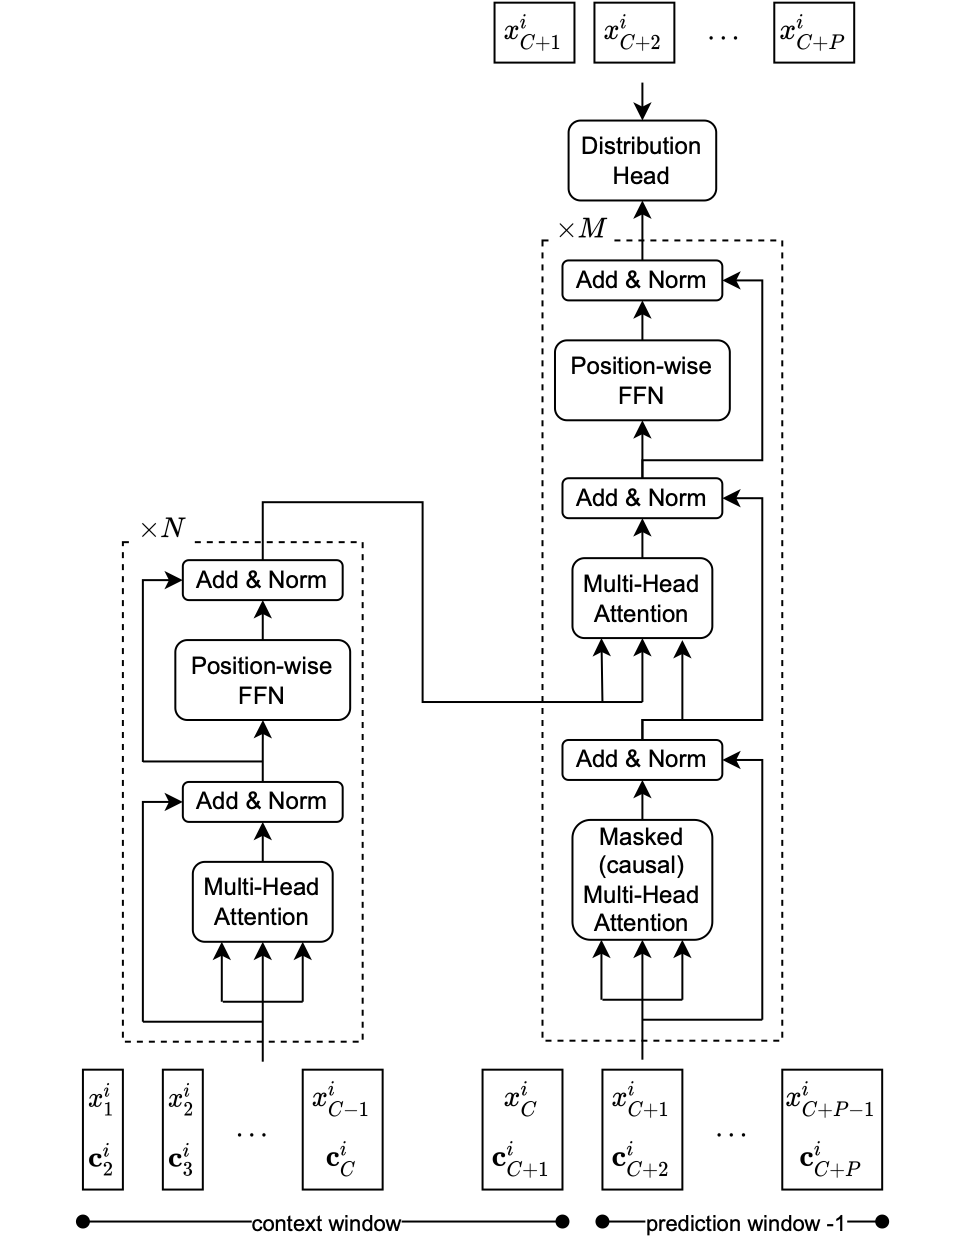

In [ ]:
estimator = TransformerEstimator(
    prediction_length=dataset.metadata.prediction_length,
    context_length=65,

    d_model=32,
    nhead=4,
    num_encoder_layers=4,
    num_decoder_layers=4,

    freq=dataset.metadata.freq,
    scaling="std",
    trainer_kwargs=dict(max_epochs=100,),
)

In [ ]:
predictor = estimator.train(dataset.train, cache_data=True, shuffle_buffer_length=1024)

In [ ]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset.test,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)

In [ ]:
forecasts = list(forecast_it)
tss = list(ts_it)

In [ ]:
evaluator = Evaluator()
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(dataset.test))

In [ ]:
print(json.dumps(agg_metrics, indent=4))

In [ ]:
item_metrics.plot(x='MSIS', y='MASE', kind='scatter', alpha=0.2)
plt.grid(which="both")
plt.show()

In [ ]:
plt.figure(figsize=(20, 15))
plt.rcParams.update({'font.size': 15})

for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 9):
    ax = plt.subplot(3, 3, idx+1)
    forecast.plot(color='g')
    ts[-3 * 24:][0].plot(label="target")
    plt.xticks(rotation=60)
    ax.set_title(forecast.item_id)

plt.gcf().tight_layout()
plt.legend()
plt.show()

## PatchTST



In [ ]:
estimator = PatchTSTEstimator(
    prediction_length=dataset.metadata.prediction_length,
    context_length=65,

    patch_len=16,

    d_model=32,
    nhead=4,
    num_encoder_layers=4,

    scaling="std",
    trainer_kwargs=dict(max_epochs=100,),
)

In [ ]:
predictor = estimator.train(dataset.train, cache_data=True, shuffle_buffer_length=1024)

In [ ]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset.test,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)

In [ ]:
forecasts = list(forecast_it)
tss = list(ts_it)

In [ ]:
evaluator = Evaluator()
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(dataset.test))

In [ ]:
print(json.dumps(agg_metrics, indent=4))

In [ ]:
item_metrics.plot(x='MSIS', y='MASE', kind='scatter', alpha=0.2)
plt.grid(which="both")
plt.show()

In [ ]:
plt.figure(figsize=(20, 15))
plt.rcParams.update({'font.size': 15})

for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 9):
    ax = plt.subplot(3, 3, idx+1)
    forecast.plot(color='g')
    ts[-3 * 24:][0].plot(label="target")
    plt.xticks(rotation=60)
    ax.set_title(forecast.item_id)

plt.gcf().tight_layout()
plt.legend()
plt.show()